In [352]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from skimage import io
from skimage import color
from skimage import util
from skimage import filters
from skimage.filters import try_all_threshold
from skimage import exposure
from skimage import data
from matplotlib.colors import LogNorm
from scipy import fftpack
from scipy import ndimage
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from skimage.filters.rank import median
from skimage.morphology import disk

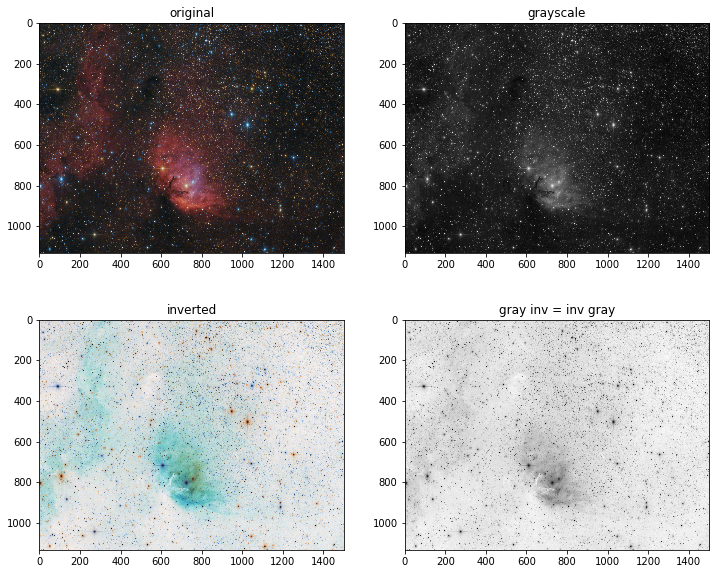

In [4]:
img = io.imread("NASA_1.jpg")
imggr = color.rgb2gray(img)
imginv = util.invert(img)
imggrinv = util.invert(imggr)
imginvgr = color.rgb2gray(imginv)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("original")
ax[1].imshow(imggr, cmap=plt.cm.gray)
ax[1].set_title("grayscale")
ax[2].imshow(imginv)
ax[2].set_title("inverted")
ax[3].imshow(imggrinv, cmap=plt.cm.gray)
ax[3].set_title("gray inv = inv gray")
plt.show()


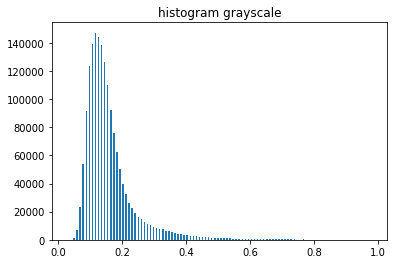

In [6]:
plt.hist(imggr.ravel(), bins=100, rwidth=.5)
#plt.legend()
plt.title('histogram grayscale')
#plt.ylim(0,10)
plt.show()
#histy, histx = exposure.histogram(imggr, nbins=256, histtype='step')
#plt.plot(histx,histy)
#imgth = exp.threshold(imggr)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


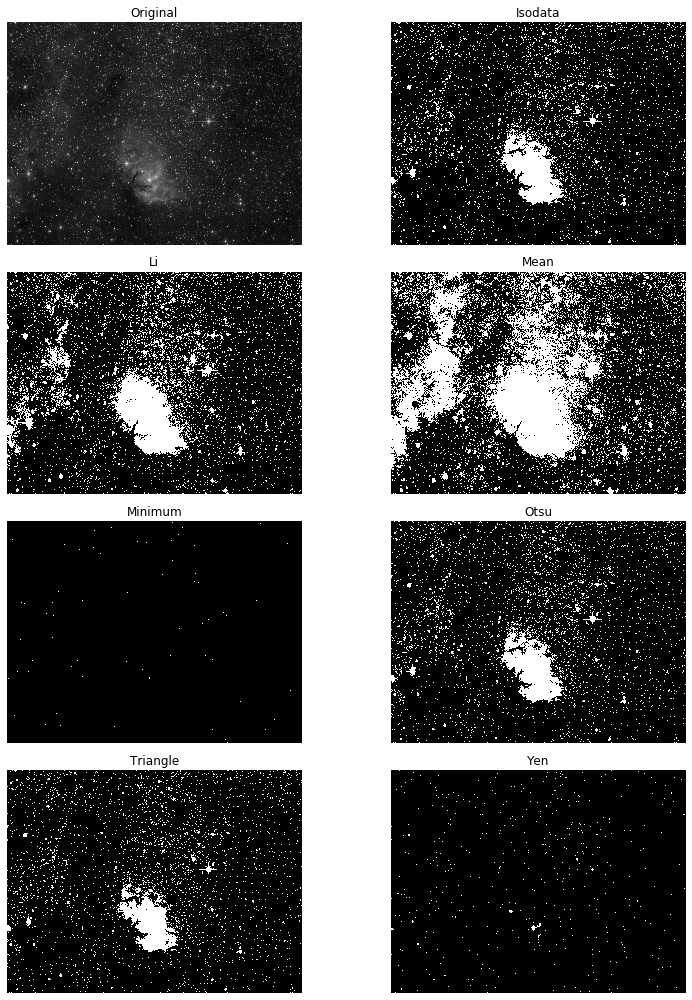

In [125]:
fig, ax = try_all_threshold(imggr, figsize=(12, 14))

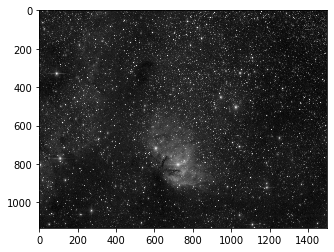

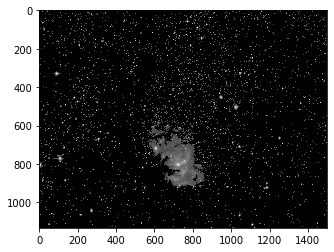

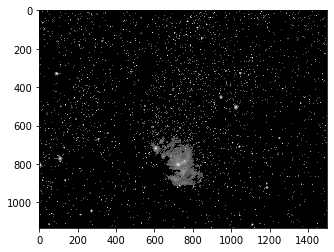

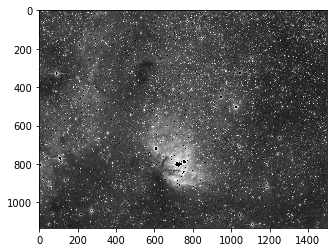

In [131]:
f1 = filters.thresholding.threshold_triangle(imggr.ravel(), nbins=100)
binf1 = imggr>=f1
imgf1 = binf1*imggr

f2 = filters.thresholding.threshold_yen(imggr.ravel(), nbins=100)
binf2 = imggr<=f2 #0.3
imgf2 = binf2*imggr

binf3 = imggr>=0.3
imgf3 = binf3*imggr

plt.imshow(imggr, cmap=plt.cm.gray)
plt.show()
plt.imshow(imgf1, cmap=plt.cm.gray)
plt.show()
plt.imshow(imgf3, cmap=plt.cm.gray)
plt.show()
plt.imshow(imgf2, cmap=plt.cm.gray)
plt.show()

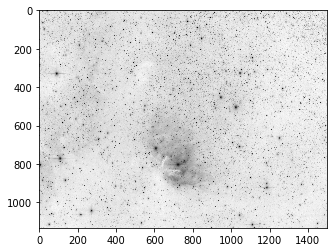

In [7]:
test = imggrinv-imggr
plt.imshow(test, cmap=plt.cm.gray)
plt.show()

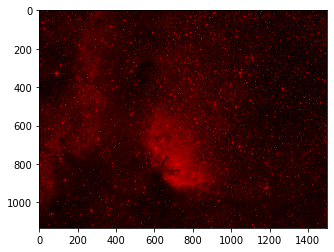

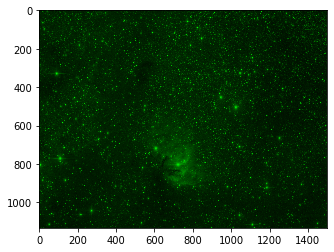

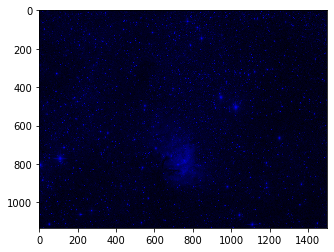

In [8]:
imgred = img.copy() # Make a copy
imgred[:,:,1] = 0
imgred[:,:,2] = 0
imggreen = img.copy() # Make a copy
imggreen[:,:,0] = 0
imggreen[:,:,2] = 0
imgblue = img.copy() # Make a copy
imgblue[:,:,0] = 0
imgblue[:,:,1] = 0

imggrred = color.rgb2gray(imgred)
imggrgreen = color.rgb2gray(imggreen)
imggrblue = color.rgb2gray(imgblue)

red=imgred[:,:,0]
green=imggreen[:,:,1]
blue=imgblue[:,:,2]

plt.imshow(imgred)
plt.show()
plt.imshow(imggreen)
plt.show()
plt.imshow(imgblue)
plt.show()

(1134, 1500)


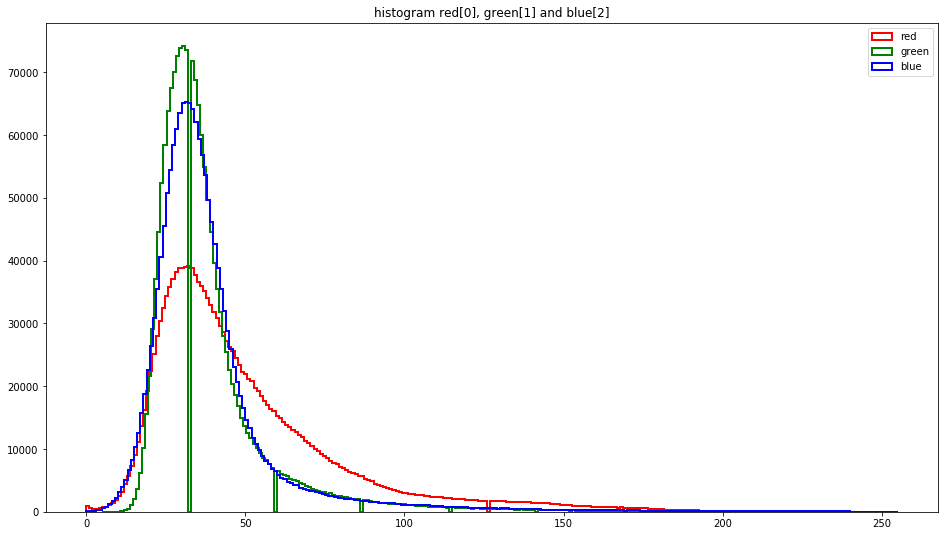

In [62]:
print(red.shape)
plt.figure(1,figsize=[16,9])
n_red, bins, patches = plt.hist(red.ravel(), bins=255, histtype='step', linewidth=2, color='red', label = 'red')
n_green, bins, patches = plt.hist(green.ravel(), bins=255, histtype='step', linewidth=2, color='green', label = 'green')
n_blue, bins, patches = plt.hist(blue.ravel(), bins=255, histtype='step', linewidth=2, color='blue', label = 'blue')
plt.title('histogram red[0], green[1] and blue[2]')
plt.legend()
plt.show()
#print(bins)
#print(n_green)

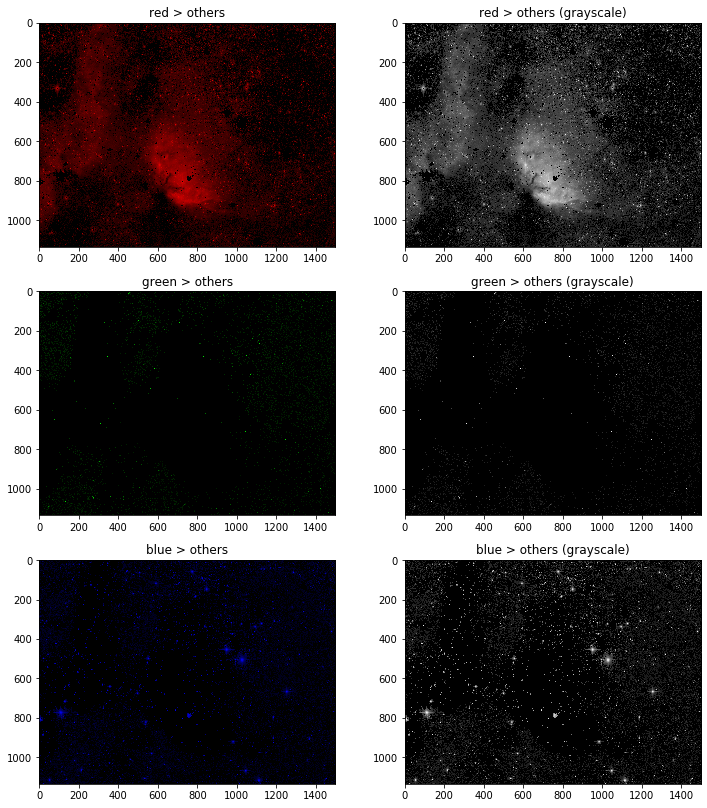

In [56]:
onlyred = img.copy() # Make a copy
onlyred[:,:,:] = 0
onlyred = np.where(red>green,red,0)
onlyred = np.where(onlyred>blue,red,0)
morered = imgred.copy()
morered[:,:,0] = onlyred

onlygreen = img.copy() # Make a copy
onlygreen[:,:,:] = 0
onlygreen = np.where(green>red,green,0)
onlygreen = np.where(onlygreen>blue,green,0)
moregreen = imggreen.copy()
moregreen[:,:,1] = onlygreen

onlyblue = img.copy() # Make a copy
onlyblue[:,:,:] = 0
onlyblue = np.where(blue>green,blue,0)
onlyblue = np.where(onlyblue>red,blue,0)
moreblue = imgblue.copy()
moreblue[:,:,2] = onlyblue


fig, axes = plt.subplots(3, 2, figsize=(12, 14))
ax = axes.ravel()
ax[0].imshow(morered)
ax[0].set_title("red > others")
ax[1].imshow(onlyred, cmap=plt.cm.gray)
ax[1].set_title("red > others (grayscale)")
ax[2].imshow(moregreen)
ax[2].set_title("green > others")
ax[3].imshow(onlygreen, cmap=plt.cm.gray)
ax[3].set_title("green > others (grayscale)")
ax[4].imshow(moreblue)
ax[4].set_title("blue > others")
ax[5].imshow(onlyblue, cmap=plt.cm.gray)
ax[5].set_title("blue > others (grayscale)")
plt.show()

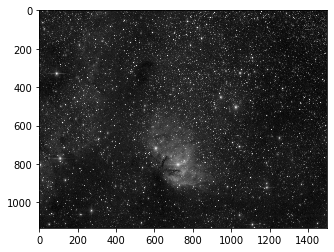

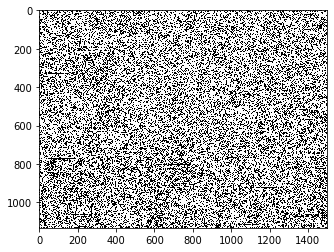

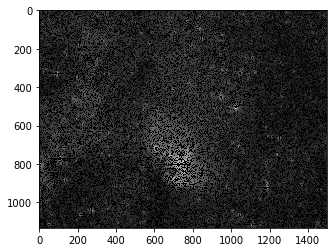

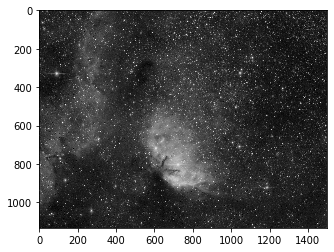

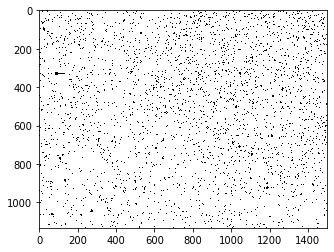

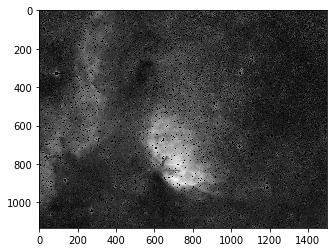

In [262]:
def localfil(image,size, off):
    fil = image < filters.threshold_local(image, block_size=size, method='mean', offset = off)
    res = fil*image
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
    plt.imshow(fil, cmap=plt.cm.gray)
    plt.show()
    filtered = plt.imshow(res, cmap=plt.cm.gray)
    plt.show()
    return res
filtered = localfil(imggr,9,0)
filtered2 = localfil(red,35,-30)

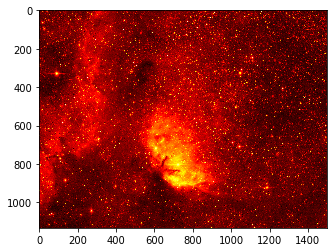

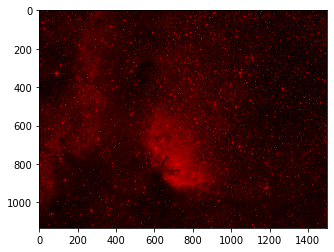

In [122]:
red=imgred[:,:,0]
#print(red[:,1])
#print(imgred)
#print(imggr)
#print(np.shape(red))
#print(np.shape(imggr))
plt.imshow(red, cmap=plt.cm.hot)
plt.show()
plt.imshow(imgred)
plt.show()

In [134]:
#adaptive thresholding
#starnet neuronales netzwerk
#highpass filter nach local filter
#hue verschieben, um gelbe sterne zu filtern
#noise: specials
#fft treshhold

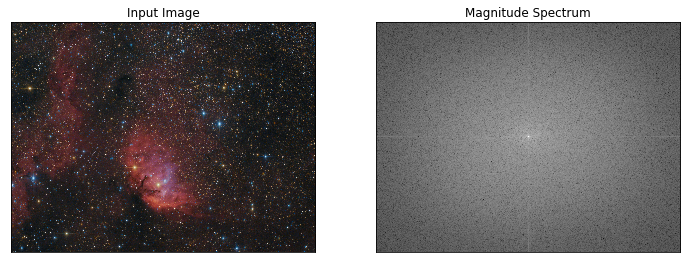

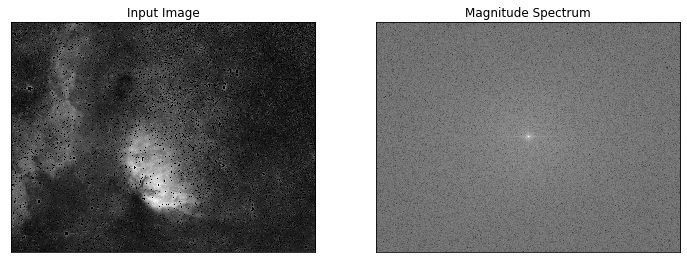

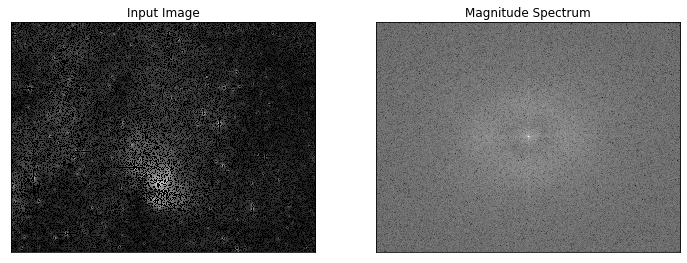

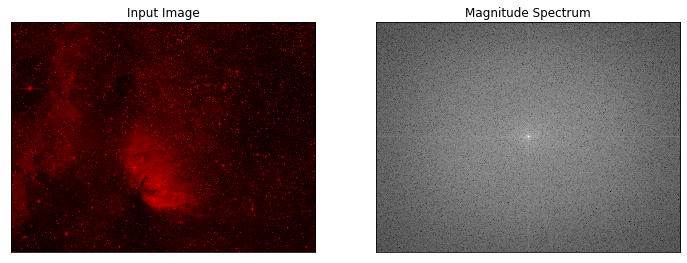

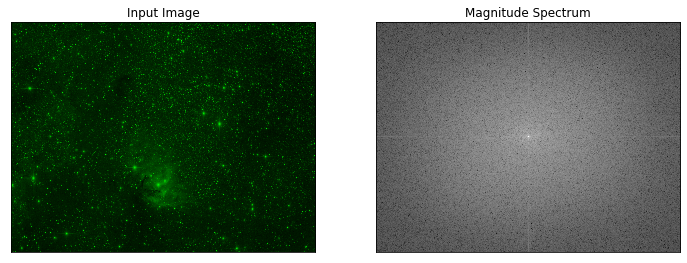

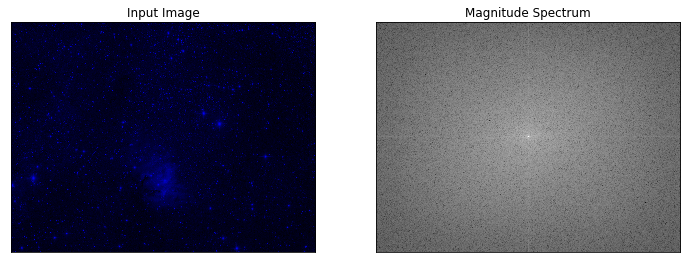

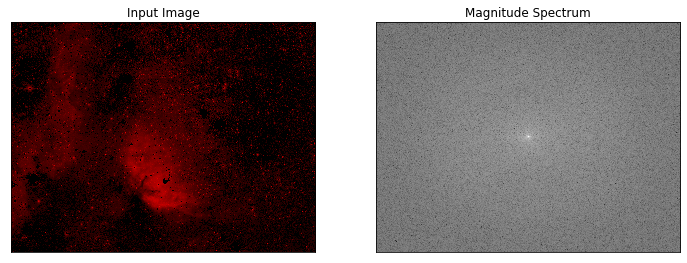

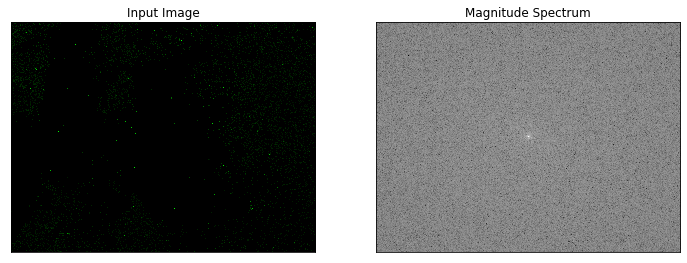

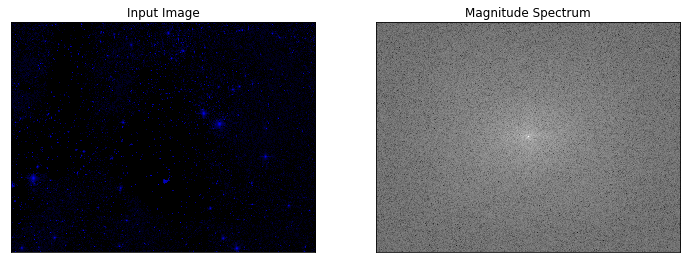

In [264]:
#Load in the image and transform it into the frequency domain.
def FFT(image):
    img = image
    gimg = color.rgb2gray(img)
    
    fft = np.fft.fft2(gimg)
    sfft = np.fft.fftshift(fft)
    magnitude_spectrum = 20*np.log(np.abs(sfft))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    plt.subplot(121), plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

FFT(img)
FFT(filtered2)
FFT(filtered)
FFT(imgred)
FFT(imggreen)
FFT(imgblue)
FFT(morered)
FFT(moregreen)
FFT(moreblue)

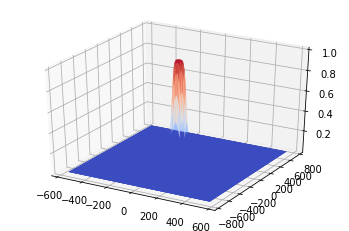

In [176]:
s = imggr.shape
M = s[0]
N = s[1]

#Define the meshgrid:

def dftuv(M,N):
    u = np.arange(0,M)
    v = np.arange(0,N)
    idx = np.where( u > (M/2) )
    idy = np.where( v > (N/2) )
    u[idx] = u[idx]-M
    v[idy] = v[idy]-N
    [V,U] = np.meshgrid(v,u)
    return(U, V)

#Define the Ideal lowpass filter:

def ideal_lpfilter(U,V,D0):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.zeros((s[0], s[1]))
    H[np.where(D <= D0)]=1
    return (H)

#Define the Butterworth lowpass filter:

def butter_lpfilter(U,V,D0, n):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = 1/(1+(D/D0)**(2*n))
    return (H)

#Define the Gaussian lowpass filter:

def gaussian_lpfilter(U,V,D0):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2)/(2*(D0**2)))
    return(H)

#Define 𝐷0

D0 = 0.05*M

#Get the meshgrid coordinates:

[U,V] = dftuv(M, N)

#Filter the image with the Butterworth lowpass filter:

n = 3
Hb = butter_lpfilter(U,V, D0, n)

#Display the filter

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(U, V, Hb, rstride = 10, cstride = 10, cmap='coolwarm')
plt.show()

In [283]:
def HPF(sfft, n):
    sfft[(crow-n):(crow+n), (ccol-n):(ccol+n)] = 0
    return sfft

def LPF(sfft, n):
    hpf = sfft.copy()
    hpf[(crow-n):(crow+n), (ccol-n):(ccol+n)] = 0
    sfft = sfft-hpf
    return sfft

def FFTfilter(image, filterfun, n):
    img = image
    gimg = color.rgb2gray(img)
    fft = np.fft.fft2(gimg)
    sfft = np.fft.fftshift(fft)
    magnitude_spectrum = 20*np.log(np.abs(sfft))
    
    rows, cols = gimg.shape
    crow,ccol = int(rows/2) , int(cols/2)
    sfft = filterfun(sfft, n)
    magnitude_spectrum = 20*np.log(np.abs(sfft))
    
    fft_ishift = np.fft.ifftshift(sfft)
    img_back = np.abs(np.fft.ifft2(fft_ishift))
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 10))
    plt.subplot(131),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Filtered FFT'), plt.xticks([]), plt.yticks([])
    plt.show()
    return img_back

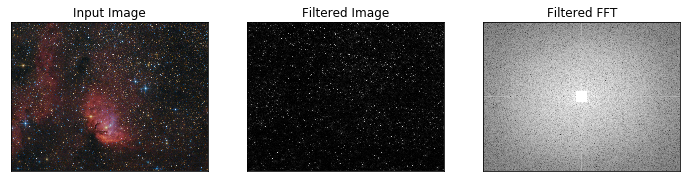

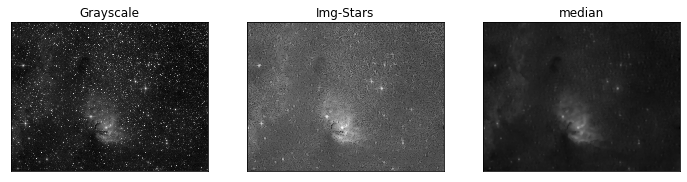

In [400]:
starsgrey = FFTfilter(img, HPF,40)
#FFTfilter(img, LPF, 50)
#FFTfilter(filtered2, LPF, 30)

nebulagrey = imggr - starsgrey
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
plt.subplot(131),plt.imshow(imggr, cmap = "gray")
plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(nebulagrey, cmap=plt.cm.gray)
plt.title('Img-Stars'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median(nebulagrey, disk(10)), vmin=0, vmax=255, cmap=plt.cm.gray)
plt.title('median'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


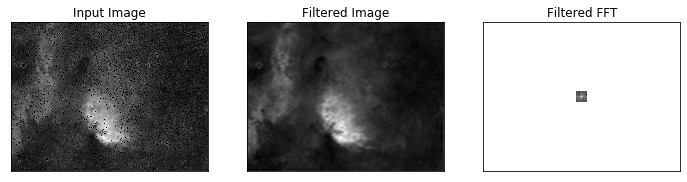

[32.48394892 32.62581685 32.77944445 ... 32.15307109 32.24593129
 32.3566403 ]


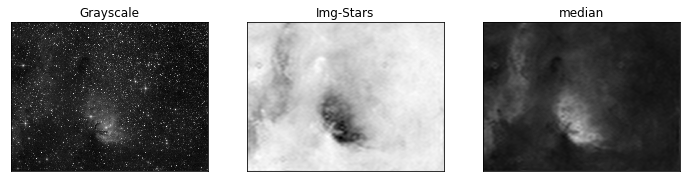

In [417]:
starsgrey = FFTfilter(filtered2, LPF,40)
#FFTfilter(img, LPF, 50)
#FFTfilter(filtered2, LPF, 30)
print(starsgrey[0])

nebulagrey = imggr - starsgrey
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
plt.subplot(131),plt.imshow(imggr, cmap = "gray")
plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(nebulagrey, cmap=plt.cm.gray)
plt.title('Img-Stars'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median((starsgrey/255).astype('float64'), disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
plt.title('median'), plt.xticks([]), plt.yticks([])
plt.show()

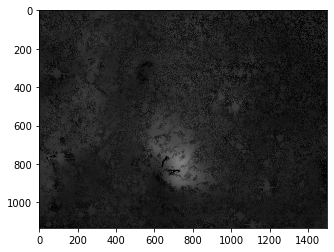

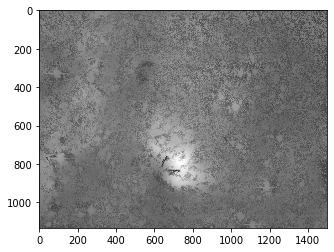

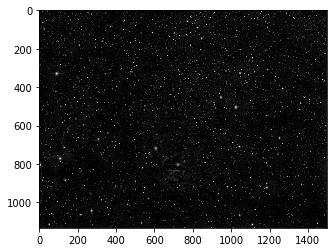

In [383]:
def to_rgb(im):
    # I would expect this to be identical to 1a
    w, h = im.shape
    ret = np.empty((w, h, 3))#, dtype=np.uint8)
    ret[:, :, 0] = im*255
    ret[:, :, 1] = ret[:, :, 2] = ret[:, :, 0]
    return ret.astype('uint8')

stars3 = to_rgb(starsgrey)
nebula = img-(stars3*2)
#nebulagrey = imggr - (starsgrey*255).astype('uint8')
nebulagrey = imggr - starsgrey
plt.imshow(median(nebulagrey, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()
plt.imshow(nebulagrey, cmap=plt.cm.gray)
plt.show()
plt.imshow(starsgrey, cmap = "gray")
plt.show()